In this Jupyter Notebook I am going to tackle a classification problem by increasing the complexity of  both: preprocessing and modeling. 

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
people_data = pd.read_csv('./census.csv',sep=',', decimal='.')

## Exploratory analysis

In [3]:
print people_data.shape
people_data.head(10)

(45222, 14)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


Having this data, I have to turn categorical variables into dummies:

In [4]:
print 'Original Features:\n', list(people_data.columns),' \n'
data_dummies = pd.get_dummies(people_data)
print 'Features after One-Hot Encoding: \n', list(data_dummies.columns)

Original Features:
['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']  

Features after One-Hot Encoding: 
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital

In [5]:
data_explorer = data_dummies.drop('income_<=50K', axis=1)
data_explorer.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_>50K
0,39,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13.0,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14.0,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,49,5.0,0.0,0.0,16.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9.0,0.0,0.0,45.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,31,14.0,14084.0,0.0,50.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
9,42,13.0,5178.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [6]:
Features = data_dummies.ix[:,'age':'native-country_ Yugoslavia']

X = Features.values
y = data_dummies['income_>50K'].values

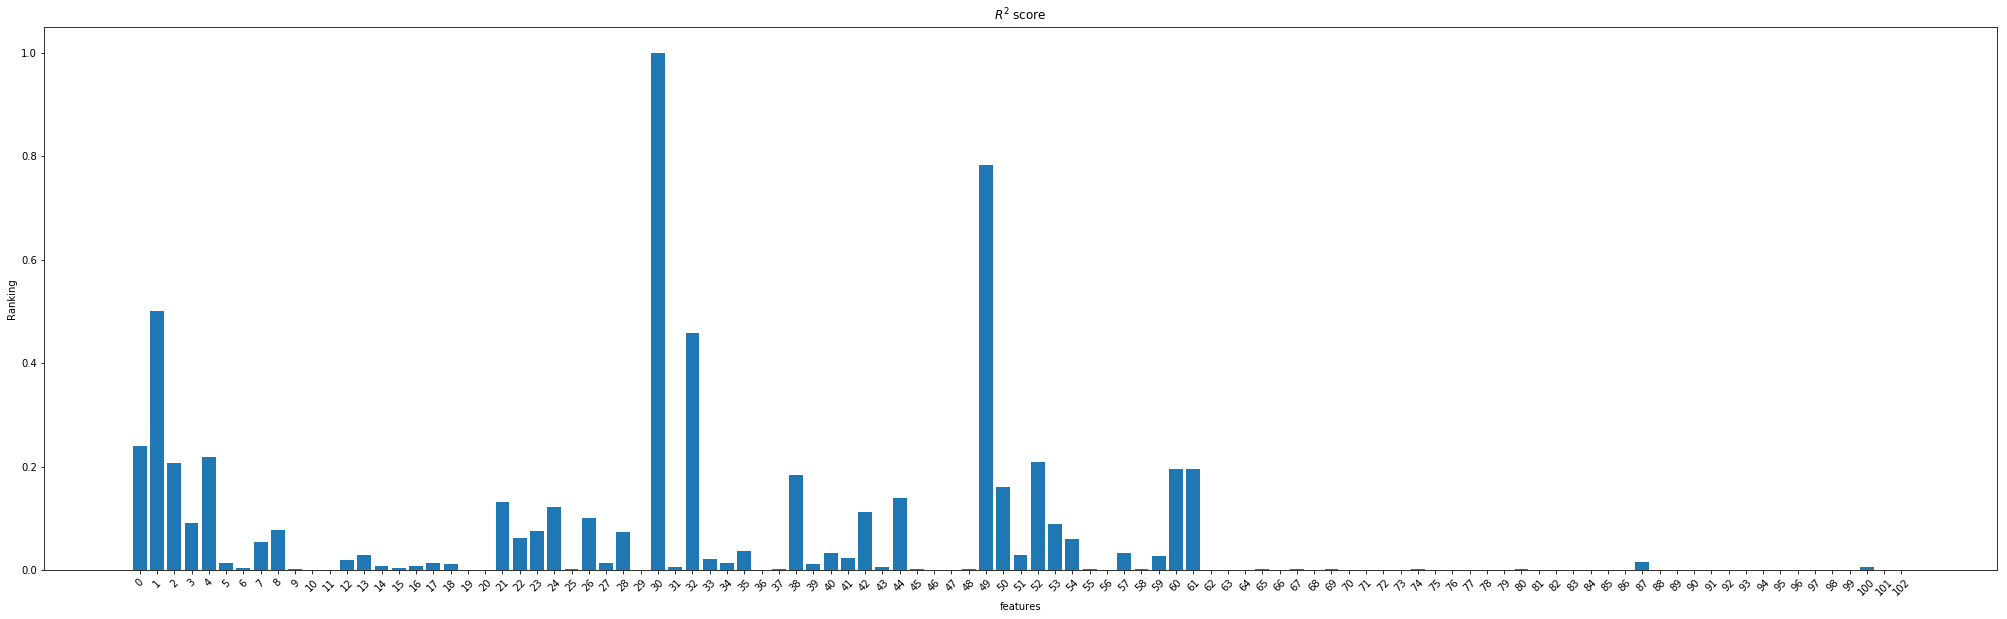

In [7]:
from sklearn.feature_selection import f_classif, mutual_info_classif

featureNames = range(104)

# do calculations
f_test, _ = f_classif(X, y)
f_test /= np.max(f_test)

# do some plotting
plt.figure(figsize=(35, 10))

plt.subplot()
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.show()

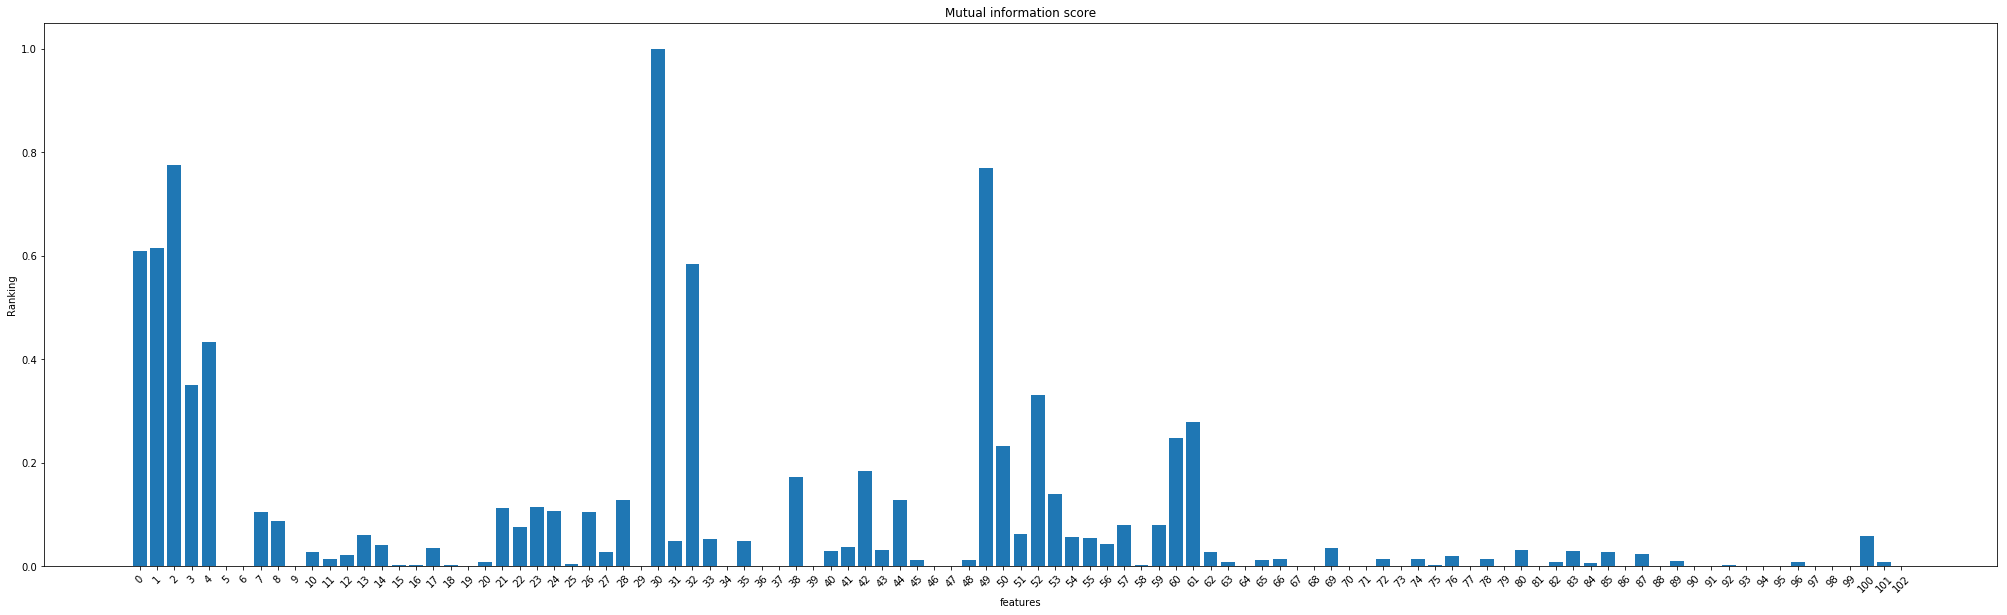

In [8]:
# do calculations
mi = mutual_info_classif(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(35, 10))

plt.subplot()
plt.bar(range(X.shape[1]),mi,  align="center")
plt.xticks(range(X.shape[1]),featureNames, rotation = 45)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

## Logistic Regression:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#...
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=.3, shuffle=True)

In [10]:
from sklearn.model_selection import GridSearchCV
log_reg= LogisticRegression().fit(X_train,y_train)

vectorC = np.logspace(-3,3,21)
param_grid = {'C': vectorC }
grid = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'),
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10).fit(X_train,y_train)
Copt = grid.best_params_['C']

lr = LogisticRegression(random_state=0, C = Copt, class_weight='balanced').fit(X_train,y_train)

In [11]:
print 'Logistic Regression ACC on the test set with C=1: {:.3f}'.format(log_reg.score(X_test,y_test))
print 'Logistic Regression ACC on the test set with "Copt"={:.3f}: {:.3f}'.format(Copt,lr.score(X_test,y_test))

Logistic Regression ACC on the test set with C=1: 0.847
Logistic Regression ACC on the test set with "Copt"=251.189: 0.795


Let's see if we can simplify the model by eliminating features:

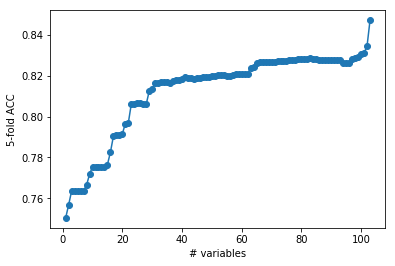

In [12]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

rfecv_lr = RFECV(estimator=LogisticRegression(),cv=5,scoring='accuracy').fit(X_train,y_train)

plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv_lr.grid_scores_) + 1), rfecv_lr.grid_scores_, '-o')
plt.show()

In [13]:
features = data_dummies.columns.drop(['income_<=50K', 'income_>50K'])

In [14]:
print('Variables seleccionadas: ',[f for f in features[rfecv_lr.support_]])
print('Acc (TEST): %0.2f'%rfecv_lr.score(X_test,y_test))

('Variables seleccionadas: ', ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical',

In this case, RFECV doesnt simplify the model so I'll try to simplify it by eliminating the features with both MI. and F-Score lower than 0.1.

In [15]:
#dropping columns from with mutual information and f-score lower than .1
X_filtered = df(X)
for i in range(103):
    if (mi[i]<.1) & (f_test[i]<.1):
        X_filtered = X_filtered.drop([i], axis=1)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered,y, random_state=0, test_size=.3, shuffle=True)
log_reg_f= LogisticRegression().fit(X_train_f,y_train_f)

In [16]:
grid_f = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'),
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10).fit(X_train_f,y_train_f)
Copt_f = grid.best_params_['C']

lr_f = LogisticRegression(random_state=0, C = Copt_f, class_weight='balanced').fit(X_train_f,y_train_f)

In [17]:
print 'Logistic Regression ACC on the filtered test set with C=1: {:.4f}'.format(log_reg_f.score(X_test_f,y_test_f))
print 'Logistic Regression ACC on the filtered test set with "COpt"={:.2f}: {:.4f}'.format(Copt_f,lr_f.score(X_test_f,y_test_f))

Logistic Regression ACC on the filtered test set with C=1: 0.8435
Logistic Regression ACC on the filtered test set with "COpt"=251.19: 0.7967


Filtering the data by MI and F-scores has worked out in this particular case: we simplify the model obtaining very similar ACC on the test set. However, seeking the optimum C by Cross Validation doesn't seem to help at all.

Let's try more complex models: starting from DecisionTreeClassifier to more complex ones.

## DecisionTreeClassifier:

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

treeModel = DecisionTreeClassifier().fit(X_train, y_train)

vectorMaxDepth = np.linspace(1, 15, 15)
param_grid1 = {'max_depth': vectorMaxDepth}
g_1=GridSearchCV(DecisionTreeClassifier(), scoring='accuracy', param_grid=param_grid1, cv=10).fit(X_train,y_train)

DepthOpt = g_1.best_params_['max_depth']

t_m = DecisionTreeClassifier(max_depth=DepthOpt).fit(X_train,y_train)

In [25]:
print 'DecisionTree ACC on the test set : {:.4f}'.format(treeModel.score(X_test,y_test))
print 'DecisionTree ACC on the test set with depth={:.2f}: {:.4f}'.format(DepthOpt,t_m.score(X_test,y_test))

DecisionTree ACC on the test set : 0.8145
DecisionTree ACC on the test set with depth=9.00: 0.8563


Let's see if we can simplify the model by eliminating features:

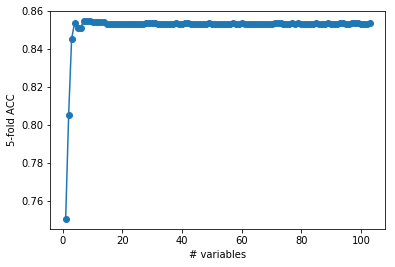

In [26]:
rfecv_dt = RFECV(estimator=DecisionTreeClassifier(max_depth=DepthOpt),cv=5,scoring='accuracy').fit(X_train,y_train)

plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv_dt.grid_scores_) + 1), rfecv_dt.grid_scores_, '-o')
plt.show()

In [27]:
print('Variables seleccionadas: ',[f for f in features[rfecv_dt.support_]])
print('Acc (TEST): %0.3f'%rfecv_dt.score(X_test,y_test))

('Variables seleccionadas: ', ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital-status_ Married-civ-spouse', 'occupation_ Exec-managerial'])
Acc (TEST): 0.853


In [28]:
selected_features = data_dummies.ix[:,('age', 'education-num', 'capital-gain', 'capital-loss', 
                          'hours-per-week', 'marital-status_ Married-civ-spouse', 
                          'occupation_ Exec-managerial', 'occupation_ Other-service', 
                          'sex_ Male')]

Xs_train, Xs_test, ys_train, ys_test = train_test_split(selected_features, y,
                           test_size = 0.3, shuffle = True, random_state = 0)

In [29]:
g_3=GridSearchCV(DecisionTreeClassifier(), scoring='accuracy', param_grid=param_grid1, 
                 cv=10).fit(Xs_train,ys_train)

DepthOpt_1 = g_3.best_params_['max_depth']

treeModel3 = DecisionTreeClassifier(max_depth=DepthOpt_1).fit(Xs_train,ys_train)

In [30]:
print 'DecisionTree ACC on the selected features test set with depth={:.2f}: {:.4f}'.format(DepthOpt_1,
                                                    treeModel3.score(Xs_test,ys_test))

DecisionTree ACC on the selected features test set with depth=9.00: 0.8547


Nice catch: similar acc scores than the first model. Let's see how the MI and Fscore filtering mode performs in this case.

In [31]:
# creamos el modelo y ajustamos
treeModel1 = DecisionTreeClassifier().fit(X_train_f, y_train_f)

g_2=GridSearchCV(DecisionTreeClassifier(), scoring='accuracy', param_grid=param_grid1, cv=10).fit(X_train_f,y_train_f)

DepthOpt_2 = g_2.best_params_['max_depth']

treeModel2 = DecisionTreeClassifier(max_depth=DepthOpt_2).fit(X_train_f,y_train_f)

In [32]:
print 'DecisionTree ACC on the filtered test set with depth=default: {:.4f}'.format(treeModel1.score(X_test_f,y_test_f))
print 'DecisionTree ACC on the filtered test set with depth={:.2f}: {:.4f}'.format(DepthOpt_2,treeModel2.score(X_test_f,y_test_f))

DecisionTree ACC on the filtered test set with depth=default: 0.8183
DecisionTree ACC on the filtered test set with depth=9.00: 0.8546


It seems to be a good way to filter the data in this problem.

DescionTree algorithim has better score than Logistic regression. The two feature selection methods(filtering by f-score and RFECV) seem to have similar results.

## Random Forest classifier

Let's play with the depth of the forests.

In [33]:
from sklearn.ensemble import RandomForestClassifier

R_forest = RandomForestClassifier().fit(X_train,y_train)

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

gr = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=100, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
gr.fit(X_train, y_train)

OpDepth=gr.best_params_['max_depth']

R_forest_1 = RandomForestClassifier(max_depth=OpDepth).fit(X_train,y_train)

In [34]:
print("Random Forest ACC on the test set with depth=default: {:.4f}".format(R_forest.score(X_test,y_test)))
print("Random Forest ACC on the test set with depth={:.2f}: {:.4f}".format(OpDepth,R_forest_1.score(X_test,y_test)))

Random Forest ACC on the test set with depth=default: 0.8381
Random Forest ACC on the test set with depth=14.00: 0.8565


It is worth it to work with the optimum depth.

Let's see if we can simplify the model by eliminating features:

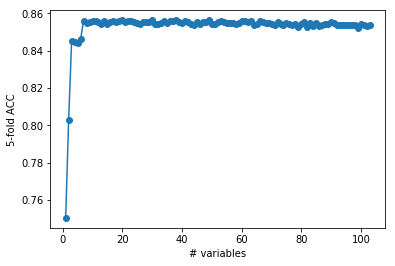

In [35]:
rfecv_rf = RFECV(estimator=RandomForestClassifier(max_depth=OpDepth),cv=5,scoring='accuracy').fit(X_train,y_train)

plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv_rf.grid_scores_) + 1), rfecv_rf.grid_scores_, '-o')
plt.show()

In [36]:
print('Variables seleccionadas: ',[f for f in features[rfecv_rf.support_]])
print('Acc (TEST): %0.4f'%rfecv_rf.score(X_test,y_test))

('Variables seleccionadas: ', ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'education_level_ 7th-8th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-civ-spouse', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Other-service', 'occupation_ Prof-specialty', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Husband', 

Not much difference, but let's give it a try

In [37]:
selected_features_rf = data_dummies.ix[:,('age', 'education-num', 'capital-gain', 'capital-loss', 
    'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc',
    'education_level_ Bachelors', 'education_level_ HS-grad', 'education_level_ Masters', 
    'marital-status_ Divorced', 'marital-status_ Married-civ-spouse', 'marital-status_ Never-married',
    'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Other-service', 
    'occupation_ Prof-specialty', 'occupation_ Sales', 'relationship_ Husband', 
    'relationship_ Not-in-family', 'relationship_ Wife', 'race_ White', 'sex_ Female', 'sex_ Male', 
    'native-country_ United-States')]

Xs_tr_rf, Xs_tst_rf, ys_tr_rf, ys_tst_rf = train_test_split(selected_features_rf, y,
                           test_size = 0.3, shuffle = True, random_state = 0)

In [38]:
gr_1=GridSearchCV(RandomForestClassifier(), scoring='accuracy', param_grid=param_grid1, 
                 cv=10).fit(Xs_tr_rf,ys_tr_rf)

OpDepth_1 = gr_1.best_params_['max_depth']

R_forest3 = RandomForestClassifier(max_depth=OpDepth_1).fit(Xs_tr_rf,ys_tr_rf)

In [39]:
print 'Random forest (depth={:.2f}) ACC-score on the selected features test set: {:.4f}'.format(OpDepth_1,
                                                    R_forest3.score(Xs_tst_rf,ys_tst_rf))

Random forest (depth=14.00) ACC-score on the selected features test set: 0.8566


It improves a little bit

RandomForestClassifier has better acc scores than a decissiontreeclassifier. No big difference though. 

## Boosted Trees

In this case i am going to play with the number of iterations and the learning rate leaving a static depth of 2. (I am running jupyter notebooks on my laptop and i dont wanna die waiting)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=2

param_gr = {'n_estimators': Niterations,'learning_rate':learningRate }
gri = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_gr, cv = 5)
gri.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200, 300], 'learning_rate': [0.5, 0.1, 0.05, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print("best mean cross-validation score: {:.3f}".format(gri.best_score_))
print("best parameters: {}".format(gri.best_params_))

best mean cross-validation score: 0.868
best parameters: {'n_estimators': 300, 'learning_rate': 0.5}


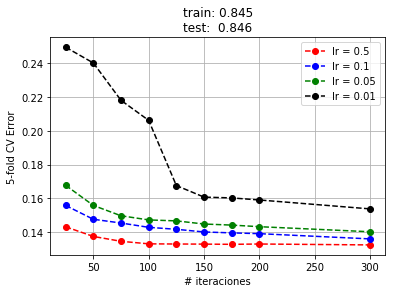

In [43]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate= 0.05, n_estimators= 50)
bt.fit(X_train,y_train)

error = 1-gri.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

Let's see if we can simplify the model by eliminating features:

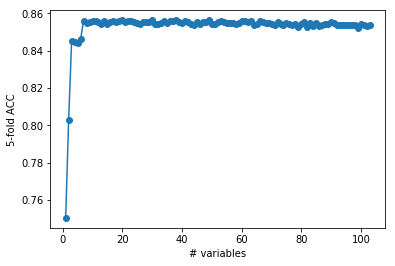

In [44]:
rfecv_bt = RFECV(estimator=GradientBoostingClassifier(),cv=5,scoring='accuracy')
rfecv_bt.fit(X_train,y_train)

plt.figure()
plt.xlabel("# variables")
plt.ylabel("5-fold ACC")
plt.plot(range(1, len(rfecv_rf.grid_scores_) + 1), rfecv_rf.grid_scores_, '-o')
plt.show()

In [45]:
print('Variables seleccionadas: ',[f for f in features[rfecv_bt.support_]])
print('Acc (TEST): %0.4f'%rfecv_bt.score(X_test,y_test))

('Variables seleccionadas: ', ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ Bachelors', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Prof-school', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'occupation_ Adm-clerical', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'relationship_ Husband', 'relationship_ Other-relative', 'relationship_ Own-child', 'relationship_ Unmarried', 'relationship_ Wife', 'race_ Black', 'race_ White', 'sex_ Female', 'sex_ Male', 'nativ

Although there are lots of variables selected we will get eigth since scores are very similar.

In [52]:
selected_features_bt = data_dummies.ix[:,('age', 'education-num', 'capital-gain', 'capital-loss', 
    'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Private')]

Xs_tr_bt, Xs_tst_bt, ys_tr_bt, ys_tst_bt = train_test_split(selected_features_bt, y,
                           test_size = 0.3, shuffle = True, random_state = 0)

In [53]:
gri.fit(Xs_tr_bt,ys_tr_bt)
print("best mean cross-validation score: {:.3f}".format(gri.best_score_))
print("best parameters: {}".format(gri.best_params_))

best mean cross-validation score: 0.841
best parameters: {'n_estimators': 200, 'learning_rate': 0.5}


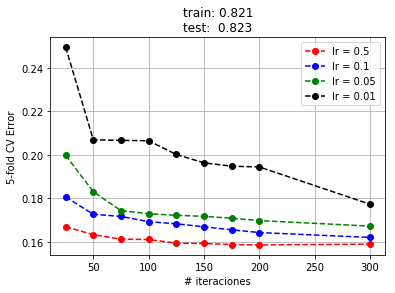

In [54]:
# calculamos métricas globales
bt_01 = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate= 0.05, n_estimators= 50)
bt_01.fit(Xs_tr_bt,ys_tr_bt)

error = 1-gri.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt_01.score(Xs_tr_bt,ys_tr_bt),bt_01.score(Xs_tst_bt,ys_tst_bt)))
plt.grid()
plt.show()

We loose some accuracy filtering the variables here. BoostedTress has not outperformed Random Forest in this case. What a pity. Maybe with more iterations other chicken would have singed!

Finally we can coclude that RandomForestClassifier is the winner!